<a href="https://colab.research.google.com/github/Pratyush1110/Machine-Learning/blob/main/HandsOnML/Chp4/Chp_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression

### The Normal Equation

$$\hat{\theta} = (X^T X)^{-1} X^T y$$

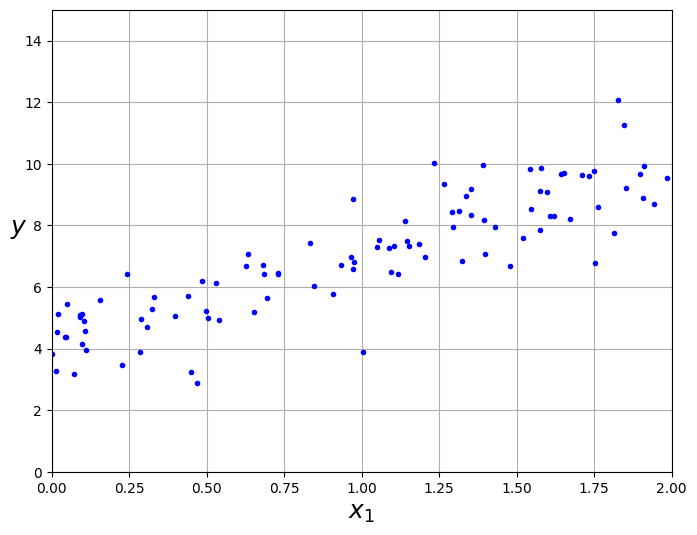

In [ ]:
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

plt.figure(figsize=(8, 6))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.show()

In [ ]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.92467732],
       [2.8980699 ]])

$\theta_0 = 3.92$: The model estimated the intercept is 3.92 (very close to 4).

$\theta_1 = 2.89$: The model estimated the slope is 2.89 (very close to 3).

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.92467732],
       [9.72081711]])

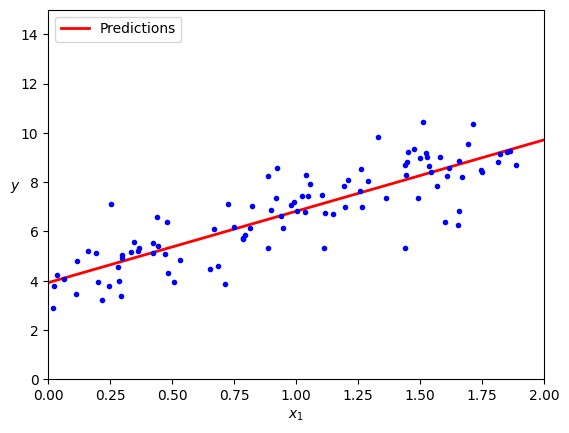

In [ ]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions") # "r-" is a red line
plt.plot(X, y, "b.") # The original blue dots
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([0, 2, 0, 15])
plt.show()

### Linear Regressiong using ScikitLearn

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.12996989]), array([[2.9018261]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.12996989],
       [9.9336221 ]])

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[6.73061422],
       [0.22782296]])

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[6.73061422],
       [0.22782296]])

### Computational Complexity

1. Feature Heavy = Very Slow: Because the complexity is between $O(n^{2.4})$ and $O(n^3)$, doubling your features ($n$) makes the math roughly 5 to 8 times slower. It hits a "wall" around 100,000 features.

2. Data Heavy = Predictable: These methods are $O(m)$ (linear) regarding the number of instances ($m$). If you double the number of rows, it just takes twice as long.

3. The RAM Limit: You must be able to fit your entire dataset into memory at once. If the data is bigger than your RAM, these methods won't work.

4. SVD is the Modern Choice: Scikit-Learn uses SVD ($O(n^2)$) because it is faster and more stable than the Normal Equation, but it still struggles with massive feature sets compared to Gradient Descent.

# Gradient Descent